In [16]:
import pandas as pd

data = pd.read_csv('krkopt.data', header=None)
data.head()

,0,1,2,3,4,5,6
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


X_str_cols = data.select_dtypes(include='object').columns
y_str_col = data.select_dtypes(include='object').iloc[:, -1].name

label_encoders = {}
for col in X_str_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
le_y = LabelEncoder()
data[y_str_col] = le_y.fit_transform(data[y_str_col])
label_encoders[y_str_col] = le_y

samples = []
for i in range(10):
    sample = data.sample(frac=0.7)
    samples.append(sample)

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'nu': [0.01, 0.1, 0.5, 0.9],
    'C': [0.1, 1, 10, 100],
}

best_params = []
best_acc = 0
for i, (X, y) in enumerate(samples):
    print(f'Sample {i+1}')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    svm = SVC()
    grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_svm = grid_search.best_estimator_
    y_train_pred = best_svm.predict(X_train_scaled)
    y_test_pred = best_svm.predict(X_test_scaled)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    print(f'Sample {i+1}:')
    print(f'Best kernel: {random_search.best_params_["kernel"]}')
    print(f'Best nu: {random_search.best_params_["nu"]}')
    print(f'Best C: {random_search.best_params_["C"]}')
    y_pred = random_search.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred.round())
    print(f'Accuracy: {accuracy:.3f}\n')
    if test_acc > best_acc:
        best_acc = test_acc
        best_svm_global = best_svm

  


Sample 1:
Best kernel: rbf
Best nu: 0.5
Best C: 10
Accuracy: 0.471


Sample 2:
Best kernel: linear
Best nu: 0.01
Best C: 100
Accuracy: 0.446


Sample 3:
Best kernel: rbf
Best nu: 0.01
Best C: 1
Accuracy: 0.481


Sample 4:
Best kernel: poly
Best nu: 0.5
Best C: 0.1
Accuracy: 0.476


Sample 5:
Best kernel: poly
Best nu: 0.01
Best C: 0.1
Accuracy: 0.466


Sample 6:
Best kernel: linear
Best nu: 0.5
Best C: 10
Accuracy: 0.453


Sample 7:
Best kernel: sigmoid
Best nu: 0.9
Best C: 1
Accuracy: 0.422


Sample 8:
Best kernel: linear
Best nu: 0.1
Best C: 1
Accuracy: 0.468


Sample 9:
Best kernel: rbf
Best nu: 0.01
Best C: 10
Accuracy: 0.414


Sample 10:
Best kernel: sigmoid
Best nu: 0.9
Best C: 100
Accuracy: 0.432


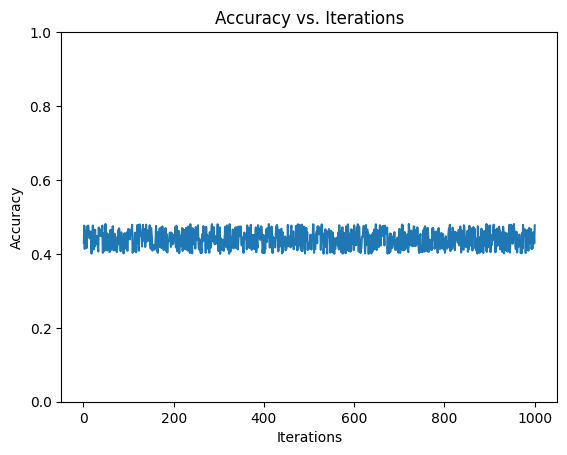

In [53]:
best_acc
plt.plot(best_acc)
plt.plot(iterations)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iterations')
plt.ylim(0, 1)
plt.show()